# Object Detection

In [1]:
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np

In [2]:
(X_train,Y_train),(X_test,Y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
print('Training Images: {}'.format(X_train.shape))
print('Testing Images: {}'.format(X_test.shape))

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)


In [4]:
X_train = X_train.reshape(X_train.shape[0],32,32,3)
X_test = X_test.reshape(X_test.shape[0],32,32,3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255
n_classes = 10

Y_train = np_utils.to_categorical(Y_train,n_classes)
Y_test = np_utils.to_categorical(Y_test, n_classes)

# MODEL BUILDING

In [5]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Conv2D,MaxPool2D, Flatten

model = Sequential()
model.add(Conv2D(50,kernel_size=(3,3),strides=(1,1), padding = 'same',activation='relu',input_shape=(32,32,3)))

model.add(Conv2D(75,kernel_size=(3,3),strides=(1,1), padding = 'same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125,kernel_size=(3,3),strides=(1,1), padding = 'same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

#hidden layer

model.add(Dense(500,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))

#Output_Layer

model.add(Dense(10, activation='softmax'))

# Compiling

In [6]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')

#training_model

model.fit(X_train,Y_train, batch_size=128, epochs=20, validation_data=(X_test,Y_test))

Epoch 1/20
391/391 [==============================] - 141s 355ms/step - loss: 1.5825 - accuracy: 0.4180 - val_loss: 1.1566 - val_accuracy: 0.5912
Epoch 2/20
391/391 [==============================] - 139s 356ms/step - loss: 1.0950 - accuracy: 0.6109 - val_loss: 0.9371 - val_accuracy: 0.6729
Epoch 3/20
391/391 [==============================] - 139s 356ms/step - loss: 0.9079 - accuracy: 0.6823 - val_loss: 0.8109 - val_accuracy: 0.7148
Epoch 4/20
391/391 [==============================] - 140s 358ms/step - loss: 0.8016 - accuracy: 0.7188 - val_loss: 0.7326 - val_accuracy: 0.7412
Epoch 5/20
391/391 [==============================] - 140s 357ms/step - loss: 0.7061 - accuracy: 0.7534 - val_loss: 0.6935 - val_accuracy: 0.7574
Epoch 6/20
391/391 [==============================] - 140s 357ms/step - loss: 0.6506 - accuracy: 0.7728 - val_loss: 0.6803 - val_accuracy: 0.7666
Epoch 7/20
391/391 [==============================] - 140s 357ms/step - loss: 0.5981 - accuracy: 0.7894 - val_loss: 0.6827 -

# Prediction

In [7]:
classes = range(0,10)

names = ['airplane',
        'automobile',
        'bird',
        'cat',
        'deer',
        'dog',
        'frog',
        'horse',
        'ship',
        'truck']

class_labels = dict(zip(classes,names))

batch = X_test[100:109]
labels = np.argmax(Y_test[100:109],axis = -1)

predictions = model.predict(batch, verbose = 1)

1/1 [==============================] - 0s 178ms/step


In [8]:
print(predictions)

[[2.74317590e-05 6.18185879e-07 1.00286804e-01 1.18632745e-02
  6.91222548e-01 7.28719356e-03 5.61354645e-05 1.89222246e-01
  1.63407458e-05 1.73295266e-05]
 [7.33825218e-05 2.92854247e-06 1.05876820e-02 1.35406896e-01
  1.17390882e-03 6.81329846e-01 5.77909872e-04 1.70677513e-01
  1.47698775e-05 1.55148708e-04]
 [2.84291474e-07 3.13535118e-08 3.93853436e-04 1.30274930e-04
  1.15987211e-06 1.40129475e-06 9.99472916e-01 3.34799459e-08
  2.16892939e-08 1.49296031e-09]
 [2.51237536e-04 6.11197811e-06 7.81308766e-03 7.84174562e-01
  1.40946180e-01 2.50810338e-03 6.29426613e-02 2.81287939e-04
  8.45087052e-05 9.92182759e-04]
 [2.99731442e-12 9.99999762e-01 1.29440428e-19 1.52604742e-20
  2.51488099e-23 2.80659216e-22 1.27915442e-17 5.87634529e-22
  2.03715556e-09 1.93335339e-07]
 [3.84474475e-07 9.99987245e-01 1.50367756e-11 3.73706122e-10
  3.15866480e-14 2.03866221e-12 5.38933953e-10 8.14278130e-16
  8.89180865e-06 3.54015674e-06]
 [1.84674680e-01 3.39070175e-05 7.49720037e-02 1.09858043e

In [9]:
for image in predictions:
    print(np.sum(image))

0.99999994
1.0
1.0
1.0
0.99999994
1.0
1.0
1.0
1.0


In [10]:
class_result = np.argmax(predictions,axis = -1)
print(class_result)

[4 5 6 3 1 1 8 6 8]


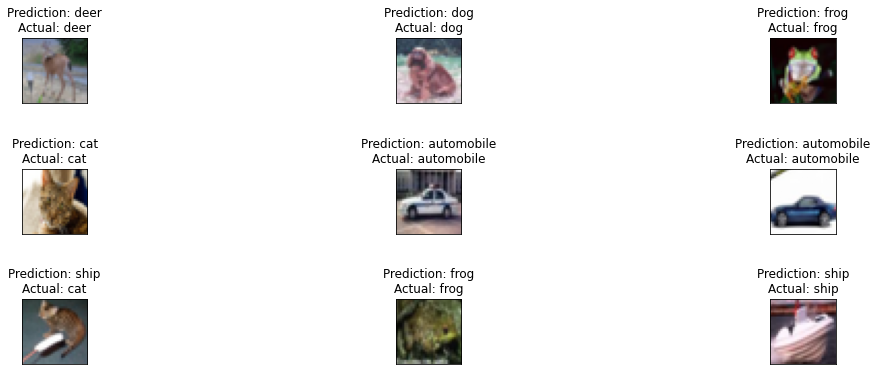

In [12]:
fig,axs = plt.subplots(3,3, figsize=(19,6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()

for i,img in enumerate(batch):
    for key,value in class_labels.items():
        if class_result[i] == key:
            title = 'Prediction: {}\nActual: {}'.format(class_labels[key], class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
            
    axs[i].imshow(img)
plt.show()